In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
picture_size = 48
folder_path = "../input/face-expression-recognition-dataset/images/"

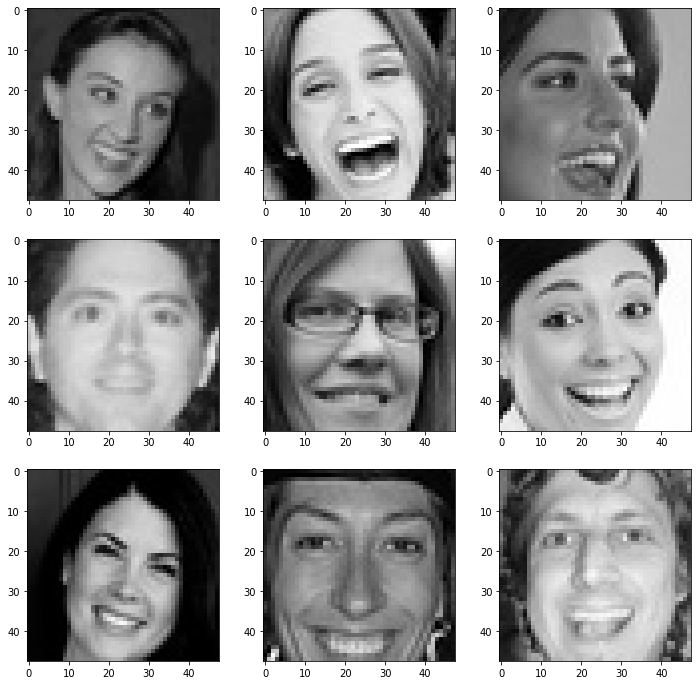

In [16]:
expression = "happy"
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    img = load_img(folder_path + "train/" + expression + "/" + os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

In [4]:
batch_size = 128

datagen_train = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [6]:
no_of_classes = 7
model = Sequential()
#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
#4th CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#fully connected 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#final output layer
model.add(Dense(no_of_classes, activation = 'softmax'))

opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_6 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 128)      

In [8]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint(filepath = '/kaggle/working/CNN.h5',
                             monitor="accuracy",
                             verbose=1,
                             save_best_only=True,
                             mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 14

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [9]:
history = model.fit(x=train_set,
                    steps_per_epoch=train_set.n//train_set.batch_size,
                    epochs=epochs,
                    validation_data = test_set,
                    validation_steps = test_set.n//test_set.batch_size,
                    callbacks=callbacks_list
                    )

2022-11-24 12:17:44.518673: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/14
225/225 [==============================] - 484s 2s/step - loss: 1.8012 - accuracy: 0.3017 - val_loss: 2.1443 - val_accuracy: 0.2592

Epoch 00001: accuracy improved from -inf to 0.30171, saving model to /kaggle/working/CNN.h5
Epoch 2/14
225/225 [==============================] - 452s 2s/step - loss: 1.4498 - accuracy: 0.4423 - val_loss: 1.6827 - val_accuracy: 0.3550

Epoch 00002: accuracy improved from 0.30171 to 0.44230, saving model to /kaggle/working/CNN.h5
Epoch 3/14
225/225 [==============================] - 457s 2s/step - loss: 1.2838 - accuracy: 0.5094 - val_loss: 1.4123 - val_accuracy: 0.4814

Epoch 00003: accuracy improved from 0.44230 to 0.50936, saving model to /kaggle/working/CNN.h5
Epoch 4/14
225/225 [==============================] - 453s 2s/step - loss: 1.1985 - accuracy: 0.5443 - val_loss: 1.2752 - val_accuracy: 0.5159

Epoch 00004: accuracy improved from 0.50936 to 0.54435, saving model to /kaggle/working/CNN.h5
Epoch 5/14
225/225 [===========================

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
num_of_test_samples = 7066 
Y_pred = model.predict(test_set, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y_pred)
print(cm)
print('Classification Report')
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 511   25   10   85  180  102   47]
 [  18   66    2    4    7   11    3]
 [ 163   18  120   82  213  235  187]
 [  55    3    2 1538  118   53   56]
 [  99    2    3  129  819  135   29]
 [ 159   10   23   91  283  549   24]
 [  22    1    8   50   50   18  648]]
Classification Report
              precision    recall  f1-score   support

       angry       0.50      0.53      0.51       960
     disgust       0.53      0.59      0.56       111
        fear       0.71      0.12      0.20      1018
       happy       0.78      0.84      0.81      1825
     neutral       0.49      0.67      0.57      1216
         sad       0.50      0.48      0.49      1139
    surprise       0.65      0.81      0.72       797

    accuracy                           0.60      7066
   macro avg       0.59      0.58      0.55      7066
weighted avg       0.62      0.60      0.57      7066



Text(69.0, 0.5, 'Truth')

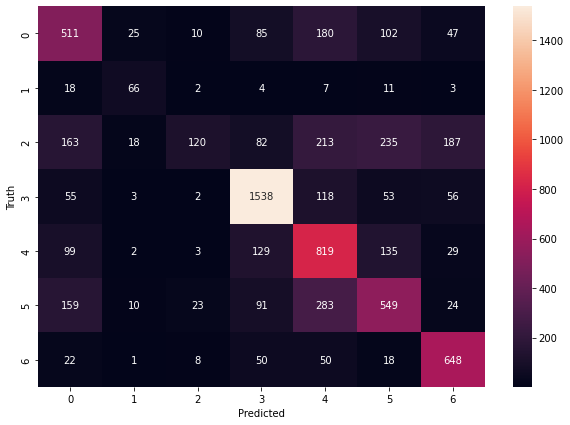

In [11]:
import seaborn as sn


plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

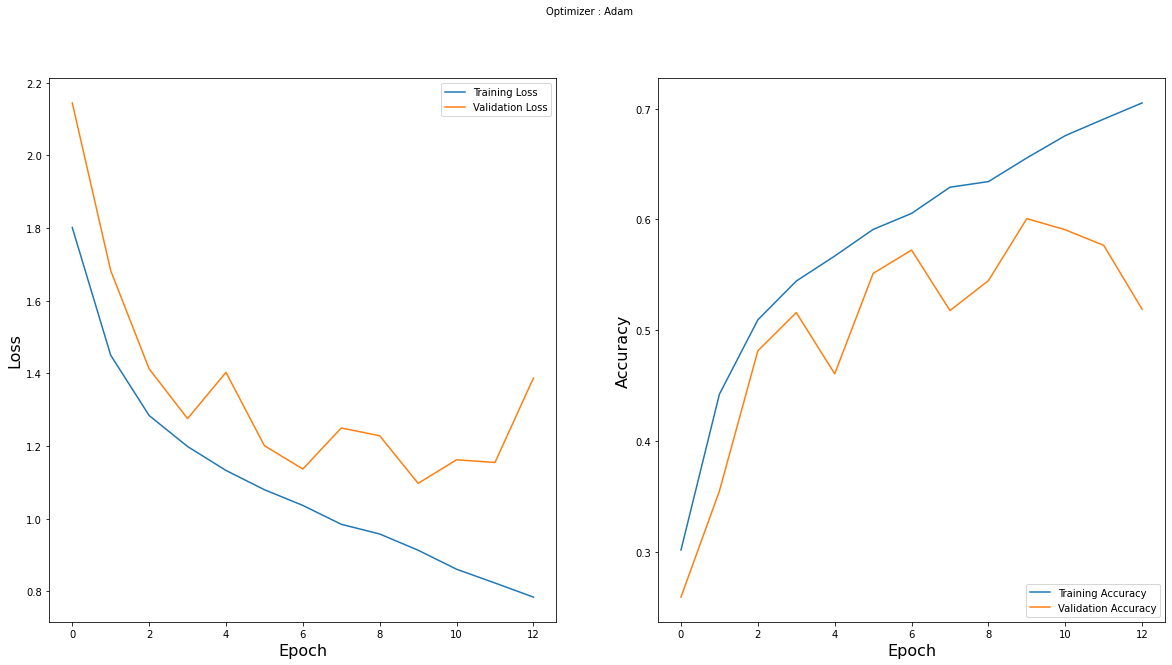

In [12]:
#plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [13]:
model.evaluate(test_set)

56/56 [==============================] - 32s 566ms/step - loss: 1.0958 - accuracy: 0.6016


[1.0958433151245117, 0.6016133427619934]

In [15]:
print(2)

2
